In [119]:
%pip install seaborn
%pin install numpy
%pip install pandas
%pip install scikit-learn
%pip install matplotlib
%pip install statsmodels
%pip install scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
UsageError: Line magic function `%pin` not found.


In [120]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv(r"C:\Users\Admin\Desktop\DAV\Titanic\tested.csv")
print(data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [121]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [122]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [124]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [125]:
data.nunique()

PassengerId    418
Survived         2
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

In [126]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [127]:
data1 = data.drop(columns = "Cabin")     #Cabin has missing values & the column is felt unneccessary

data1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [128]:
from sklearn.impute import SimpleImputer

age_imputer = SimpleImputer(strategy="mean")
data1["Age"] = age_imputer.fit_transform(data1["Age"].values.reshape(-1, 1))

data1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

<Axes: ylabel='Age'>

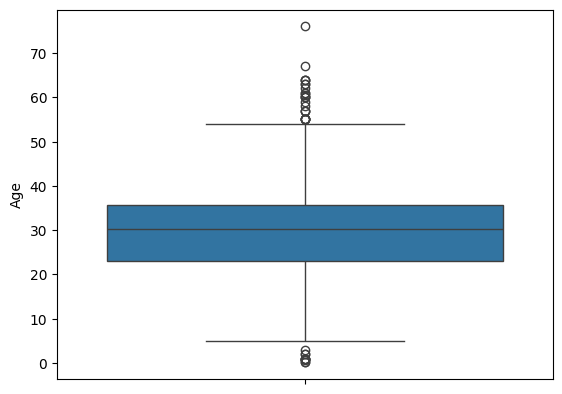

In [129]:
sns.boxplot(data = data1["Age"])

<Axes: ylabel='Age'>

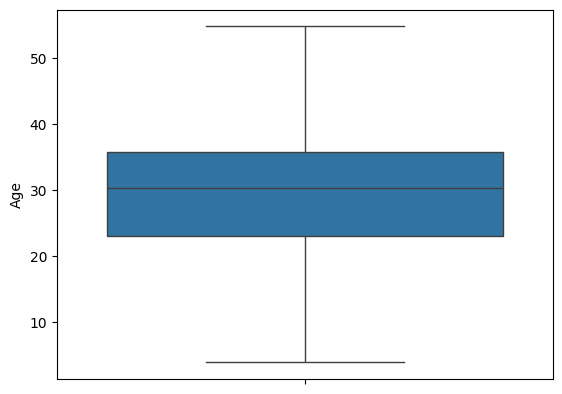

In [130]:

Q1 = data1["Age"].quantile(0.25)
Q3 = data1["Age"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data1_copy = data1.copy()

data1_copy["Age"] = np.where(data1_copy["Age"] > upper_bound, upper_bound, 
                             np.where(data1_copy["Age"] < lower_bound, lower_bound,
                                      data1_copy["Age"]))

sns.boxplot(data1_copy["Age"])


<Axes: ylabel='Fare'>

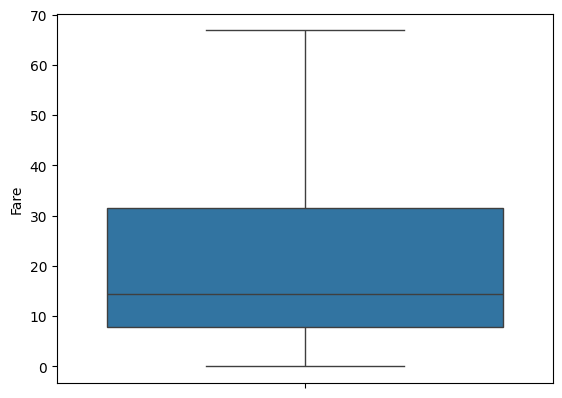

In [131]:
Q1 = data1["Fare"].quantile(0.25)
Q3 = data1["Fare"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data1_copy = data1.copy()

data1_copy["Fare"] = np.where(data1_copy["Fare"] > upper_bound, upper_bound, 
                             np.where(data1_copy["Fare"] < lower_bound, lower_bound,
                                      data1_copy["Fare"]))

sns.boxplot(data1_copy["Fare"])

In [132]:
encoded_data = data1_copy.copy()
encoded_data["Sex"] = pd.get_dummies(data1_copy["Sex"], drop_first=True)


<Axes: xlabel='Survived', ylabel='count'>

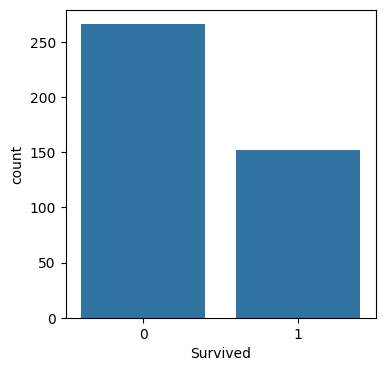

In [133]:
plt.figure(figsize=(4,4))
sns.countplot(x = 'Survived', data = encoded_data)

<Axes: xlabel='SibSp', ylabel='count'>

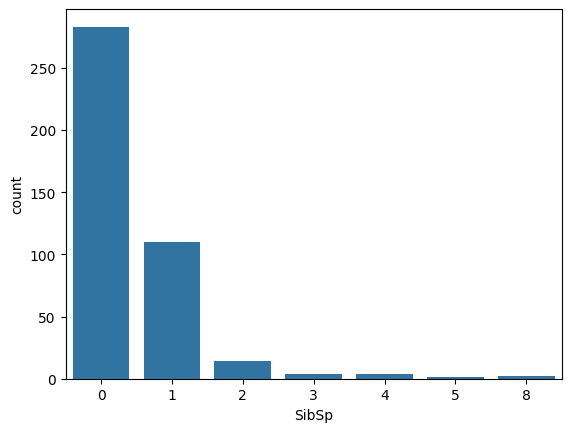

In [134]:
sns.countplot(x = "SibSp", data = data1_copy)

<Axes: xlabel='Age', ylabel='Count'>

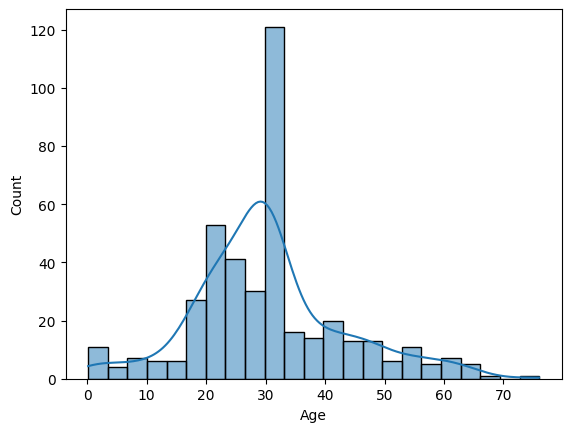

In [135]:
sns.histplot(data1_copy["Age"], kde = True)

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


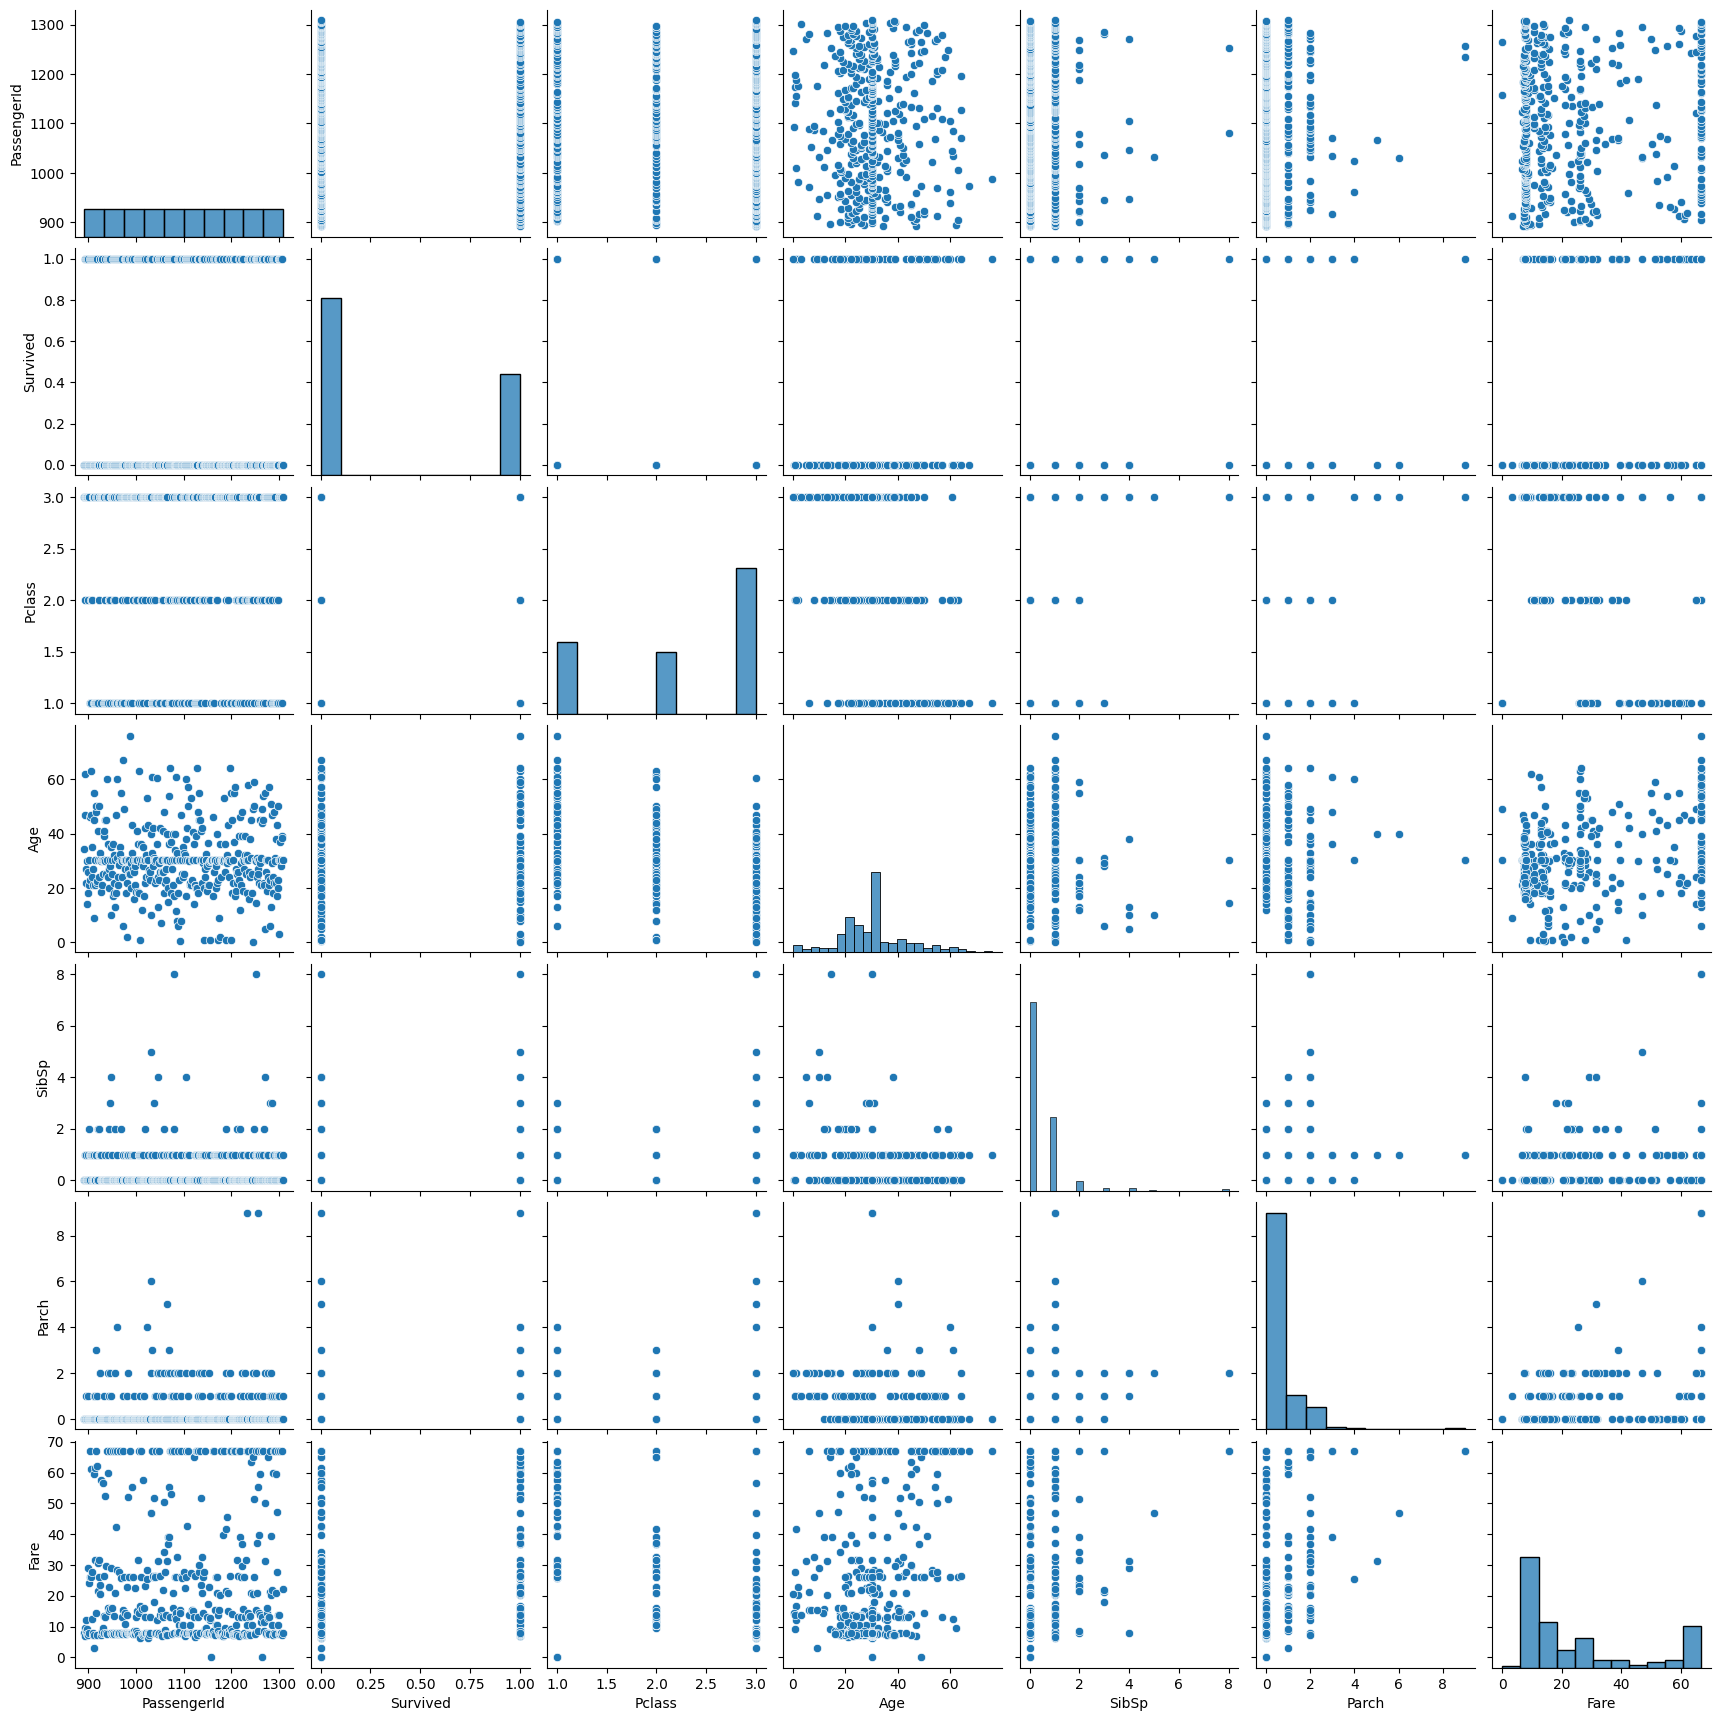

In [136]:
sns.pairplot(data1_copy)

<Axes: xlabel='Age', ylabel='Survived'>

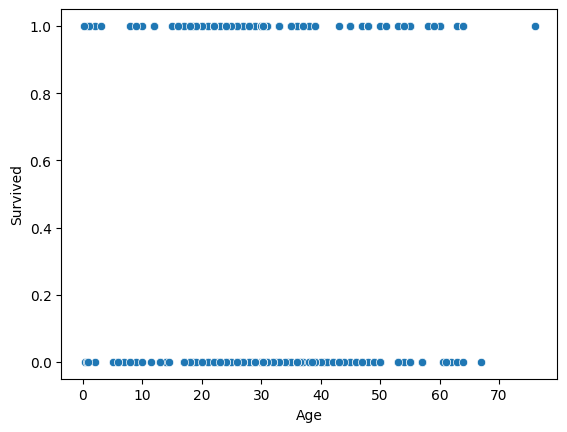

In [137]:
sns.scatterplot(x = data1_copy["Age"], y = data1_copy["Survived"])

In [138]:
mean = np.mean(data1_copy["SibSp"])
median = np.median(data1_copy["SibSp"])
mode = data1_copy["SibSp"].mode()
std = data1_copy["SibSp"].std()

print(mean, median, mode, std)

0.4473684210526316 0.0 0    0
Name: SibSp, dtype: int64 0.8967595611217135


             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.023245 -0.026751 -0.030874  0.003818  0.043080   
Survived       -0.023245  1.000000 -0.108615 -0.000011  0.099943  0.159120   
Pclass         -0.026751 -0.108615  1.000000 -0.440782  0.001087  0.018721   
Age            -0.030874 -0.000011 -0.440782  1.000000 -0.079535 -0.045073   
SibSp           0.003818  0.099943  0.001087 -0.079535  1.000000  0.306895   
Parch           0.043080  0.159120  0.018721 -0.045073  0.306895  1.000000   
Fare            0.049299  0.203837 -0.748550  0.339060  0.302983  0.315141   

                 Fare  
PassengerId  0.049299  
Survived     0.203837  
Pclass      -0.748550  
Age          0.339060  
SibSp        0.302983  
Parch        0.315141  
Fare         1.000000  


<Axes: >

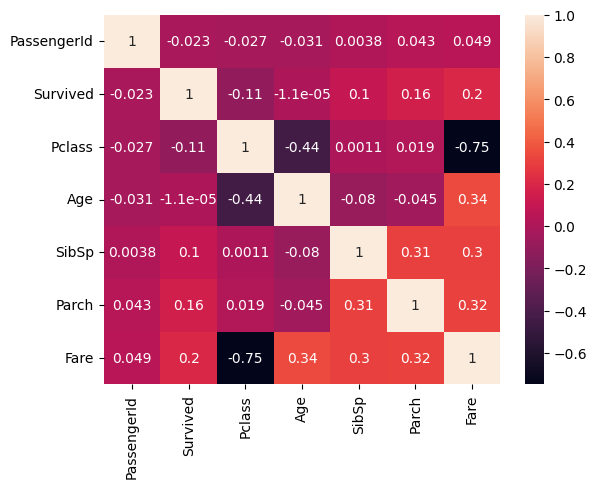

In [139]:
numerical_columns = encoded_data.select_dtypes(include = "number").columns
correlation_matrix = encoded_data[numerical_columns].corr()
print(correlation_matrix)

sns.heatmap(correlation_matrix, annot=True)

In [140]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


selected_features = ["Age", "Pclass", "SibSp"]

y = encoded_data["Survived"]
x = encoded_data[selected_features]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

y_predict = linear_model.predict(x_test)

print("MSE", mean_squared_error(y_test, y_predict))
print("R2", r2_score(y_test, y_predict))

MSE 0.2477083562514172
R2 -0.0281353892411762


In [141]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

selected_features = ["Age", "Pclass", "SibSp"]
x = encoded_data[selected_features]
y = encoded_data["Survived"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)

y_predict = logistic_model.predict(x_test)

print("Accuracy Score", accuracy_score(y_test, y_predict))
print("Confusion Matrix", confusion_matrix(y_test, y_predict))

Accuracy Score 0.6071428571428571
Confusion Matrix [[50  0]
 [33  1]]


In [154]:
%pip install statsmodels

     ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/9.2 MB 279.3 kB/s eta 0:00:33
     ---------------------------------------- 0.0/9.2 MB 279.3 kB/s eta 0:00:33
     ---------------------------------------- 0.1/9.2 MB 204.8 kB/s eta 0:00:45
     ---------------------------------------- 0.1/9.2 MB 327.2 kB/s eta 0:00:28
     ---------------------------------------- 0.1/9.2 MB 327.2 kB/s eta 0:00:28
     ---------------------------------------- 0.1/9.2 MB 327.2 kB/s eta 0:00:28
     ---------------------------------------- 0.1/9.2 MB 327.2 kB/s eta 0:00:28
     ---------------------------------------- 0.1/9.2 MB 327.2 kB/s eta 0:00:28
     


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [155]:
from statsmodels.stats.weightstats import ztest

sample1 = encoded_data["Age"]
sample2 = encoded_data["Survived"]

t_score, p_value = ztest(sample1, sample2)

if p_value < 0.05:
    print("Reject Null Hypothesis: There is significant difference between age & survival")
else:
    print("Accpet Null Hypothesis: There is no significant difference between age & survival")

Reject Null Hypothesis: There is significant difference between age & survival


In [153]:
from scipy import stats

sample1 = encoded_data["Age"].sample(n = 20)
sample2 = encoded_data["Survived"].sample(n = 20)

t_score, p_value = stats.ttest_ind(sample1, sample2)

if p_value < 0.05:
    print("Reject Null Hypothesis: There is significant difference between age & survival")
else:
    print("Accpet Null Hypothesis: There is no significant difference between age & survival")

Reject Null Hypothesis: There is significant difference between age & survival


In [149]:
from scipy import stats

sample1 = encoded_data["Age"]
sample2 = encoded_data["Survived"]
sample3 = encoded_data["Fare"]

anova, p_value = stats.f_oneway(sample1, sample2, sample3)

if p_value < 0.05:
    print("Reject Null Hypothesis: There is significant difference between age, fare & survival")
else:
    print("Accpet Null Hypothesis: There is no significant difference between age, fare & survival")

Accpet Null Hypothesis: There is no significant difference between age, fare & survival
